<a href="https://colab.research.google.com/github/daniyalaamir110/ML_course/blob/main/9_gradient_descent_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [111]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

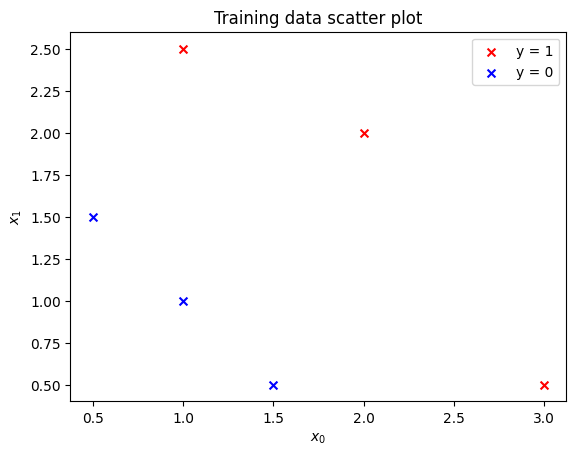

In [112]:
positive_points = X_train[y_train.flatten() == 1]
negative_points = X_train[y_train.flatten() == 0]

plt.scatter(positive_points[:, 0], positive_points[:, 1], marker="x", s=32, c="r", label="y = 1")
plt.scatter(negative_points[:, 0], negative_points[:, 1], marker="x", s=32, c="b", label="y = 0")

plt.legend()

plt.xlabel("$x_0$")
plt.ylabel("$x_1$")

plt.title("Training data scatter plot")

plt.show()

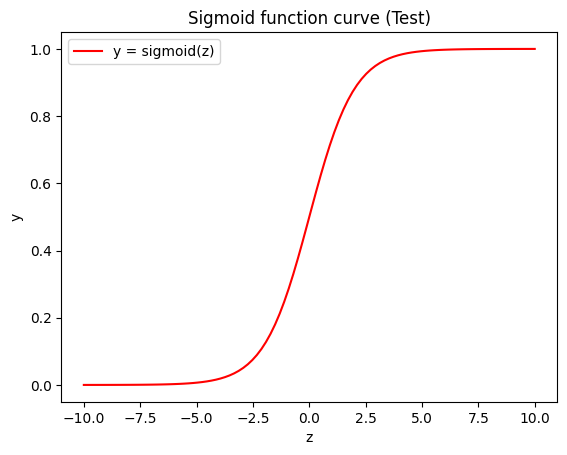

In [113]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def test_sigmoid():
  z = np.linspace(-10, 10, 100)
  y = sigmoid(z)
  plt.plot(z, y, c="r", label="y = sigmoid(z)")
  plt.xlabel("z")
  plt.ylabel("y")
  plt.title("Sigmoid function curve (Test)")
  plt.legend()
  plt.show()

test_sigmoid()

In [114]:
def compute_linear(x, w, b):
  f_wb = np.dot(x, w) + b
  return f_wb

compute_linear(2, 2, 1)

5

In [115]:
def compute_logistic(x, w, b):
  z = compute_linear(x, w, b)
  f_wb = sigmoid(z)
  return f_wb

compute_logistic(2, 2, 1)

0.9933071490757153

In [116]:
def compute_loss(x, y, w, b, logistic_function):
  f_wb = logistic_function(x, w, b)
  loss = -y * np.log(f_wb) - (1 - y) * np.log(1 - f_wb)
  return loss

compute_loss(2, 1, 2, 1, compute_logistic)

0.006715348489117944

In [117]:
def compute_cost(x, y, w, b, logistic_function, loss_function):
  m = np.size(x, axis=0)

  net_loss = np.sum(loss_function(x, y, w, b, logistic_function), axis=0)
  cost = net_loss / m
  return cost


def test_compute_cost():
  x = np.array([[2, 3]])
  y = np.array([1]).reshape(-1, 1)
  w = 2
  b = 1
  cost = compute_cost(x, y, w, b, compute_logistic, compute_loss)
  return cost

test_compute_cost()

array([0.00671535, 0.00091147])

In [118]:
def compute_gradient(x, y, w, b, logistic_function):
  m = np.size(x, axis=0)

  f_wb = logistic_function(x, w, b)
  dj_dw = np.sum(x * (f_wb - y).reshape(-1, 1)) / m
  dj_db = np.sum(f_wb - y) / m

  return dj_dw, dj_db

def test_compute_gradient():
  x = np.array([[2, 2]])
  y = np.array([1]).reshape(-1, 1)
  w = 2
  b = 1
  dj_dw, dj_db = compute_gradient(x, y, w, b, compute_logistic)
  return dj_dw, dj_db

test_compute_gradient()

(-0.05354280739427786, -0.013385701848569465)

In [119]:
def gradient_descent(x, y, w_init, b_init, iters, alpha, logistic_function, loss_function, cost_function, gradient_function):
  m = np.size(x, axis=0)

  w = w_init
  b = b_init

  i_hist = np.zeros(iters)
  j_hist = np.zeros(iters * 2).reshape(-1, 2)

  step = math.ceil(iters / 10)

  for i in range(iters):
    cost_i = cost_function(x, y, w, b, logistic_function, loss_function)

    i_hist[i] = i
    j_hist[i] = cost_i

    dj_dw_i, dj_db_i = gradient_function(x, y, w, b, logistic_function)

    w = w - alpha * dj_dw_i
    b = b - alpha * dj_db_i

    if ((i + 1) % step == 0):
      print(f"Iteration {i + 1}: \tcost = {cost_i},\t w = {w},\t b = {b}")


  return w, b, i_hist, j_hist

In [120]:
w_init = np.zeros_like(X_train[0])
b_init = 0

iters = 10000
alpha = 0.1

w_final, b_final, i_hist, j_hist = gradient_descent(X_train, y_train, w_init, b_init, iters, alpha, compute_logistic, compute_loss, compute_cost, compute_gradient)

Iteration 1000: 	cost = 0.1458085657469803,	 w = [2.3378778 2.3378778],	 b = -6.274484912399438
Iteration 2000: 	cost = 0.07656571619232368,	 w = [3.20795922 3.20795922],	 b = -8.71241668115375
Iteration 3000: 	cost = 0.0514265492298784,	 w = [3.74064598 3.74064598],	 b = -10.194684975246496
Iteration 4000: 	cost = 0.038604026944766064,	 w = [4.12324212 4.12324212],	 b = -11.256200571585016
Iteration 5000: 	cost = 0.03086243975554877,	 w = [4.42135254 4.42135254],	 b = -12.081956342200524
Iteration 6000: 	cost = 0.02569169850966507,	 w = [4.66538511 4.66538511],	 b = -12.757202224176003
Iteration 7000: 	cost = 0.021997539945704123,	 w = [4.87187269 4.87187269],	 b = -13.328132541117903
Iteration 8000: 	cost = 0.019228255244661655,	 w = [5.05078823 5.05078823],	 b = -13.822550291136137
Iteration 9000: 	cost = 0.017076020899855077,	 w = [5.20860507 5.20860507],	 b = -14.25847311181418
Iteration 10000: 	cost = 0.015355735090159514,	 w = [5.3497607 5.3497607],	 b = -14.648237107471077


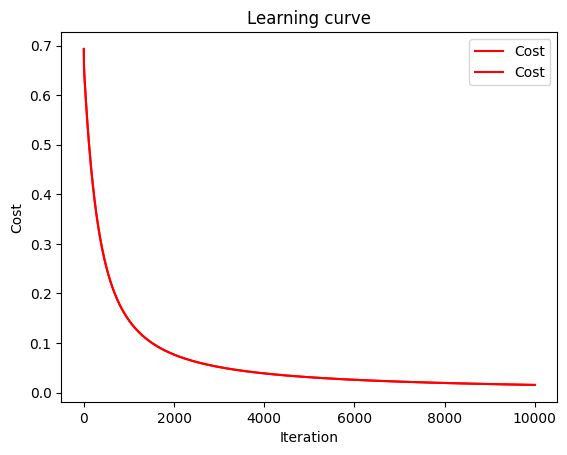

In [121]:
def draw_learning_curve(i_hist, j_hist):
  plt.plot(i_hist, j_hist, label="Cost", c="r")
  plt.xlabel("Iteration")
  plt.ylabel("Cost")
  plt.title("Learning curve")
  plt.legend()
  plt.show()


draw_learning_curve(i_hist, j_hist)

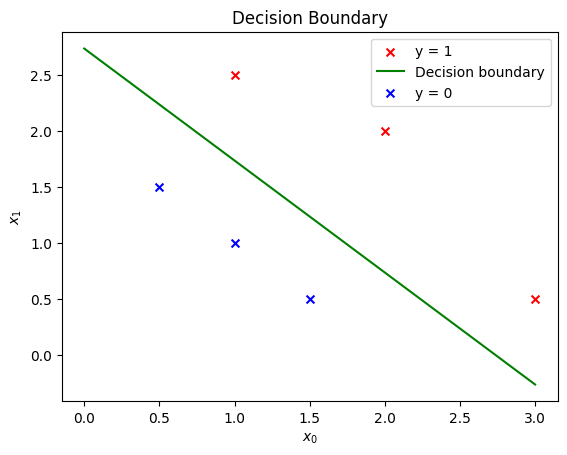

In [122]:
x0_dec = np.linspace(0, 3, 100)
x1_dec = (-b_final - w_final[0] * x0_dec) / w_final[1]

plt.scatter(positive_points[:, 0], positive_points[:, 1], marker="x", s=32, c="r", label="y = 1")
plt.plot(x0_dec, x1_dec, c="g", label="Decision boundary")
plt.scatter(negative_points[:, 0], negative_points[:, 1], marker="x", s=32, c="b", label="y = 0")

plt.legend()

plt.xlabel("$x_0$")
plt.ylabel("$x_1$")

plt.title("Decision Boundary")

plt.show()